In [158]:
import requests
import datetime
import json
import csv
import time
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.stdout = default_stdout
sys.stderr = default_stderr
sys.setdefaultencoding('utf-8')



In [166]:
def get_page_posts_to_df(url,status_id_url_end):

    r= requests.get(url)
    r.encoding="utf-8"
    jsondata = r.json()
    frames = []
    # 只要有分頁連結就一直往下
    x=0
    while 'paging' in jsondata:
        x +=1
        for data in jsondata['data']:
            status_id = data['id']
            fb_graph_api = "https://graph.facebook.com/v2.8/"
            status_id_url = fb_graph_api+status_id+status_id_url_end
            status_idr= requests.get(status_id_url)
            status_idr.encoding="utf-8"
            status_id_data = status_idr.json()
            temp= []
            temp.append(data['id'])
            time_line=datetime.datetime.strptime(data['created_time'],"%Y-%m-%dT%H:%M:%S+0000")
            temp.append(time_line)
            if 'message' in data:
                temp.append(data['message'])
            else:
                temp.append(np.nan)
            if 'name' in status_id_data:
                temp.append(status_id_data['name'])
            else:
                temp.append(np.nan)
            if 'link' in status_id_data:
                temp.append(status_id_data['link'])
            else:
                temp.append(np.nan)
            temp.append(status_id_data['type'])
            temp.append(status_id_data['reactions']['summary']['total_count'])
            temp.append(status_id_data['comments']['summary']['total_count'])
            if 'shares' in status_id_data:
                temp.append(status_id_data['shares']['count'])
            else:
                temp.append(np.nan)
                
            frames.append(temp)

        newurl = jsondata['paging']['next']
        newr= requests.get(newurl)
        newr.encoding="utf-8"
        jsondata = newr.json()
        print x

        #若超過100個分頁就先暫停
        if x==100:
            break
    testdf = pd.DataFrame(frames)
    testdf.columns= ['status_id','create_time','message','name','link','type','reactions','comments','shares'];
    print "done"
    return testdf

In [167]:
fb_graph_api = "https://graph.facebook.com/v2.8/"
# fb page id
nodes = "YaoTurningTaipei/posts"

app_id = "393833577650615"
app_secret = "3ab280dac70995e4d8e601cbc025b53a"
access_token = "access_token="+app_id + "|" + app_secret

url = fb_graph_api+nodes+"?"+access_token

fields = "/?fields=id,type,name,link,shares,comments.limit(0).summary(total_count),reactions.limit(0).summary(total_count)"

status_id_url_end = fields+"&"+access_token

# print url

In [168]:
datadf = get_page_posts_to_df(url,status_id_url_end)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
done


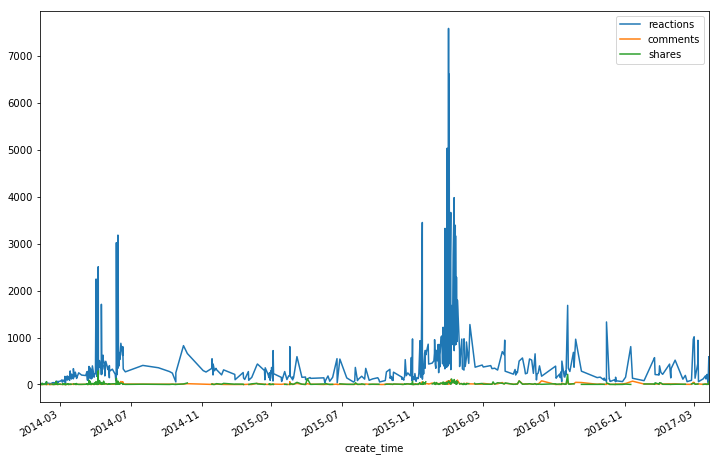

In [169]:
datadf.plot(datadf.create_time,figsize=(12,8))

In [174]:
datadf.ix[datadf.reactions>5000].to_csv('over5g.csv',index=False)

In [6]:
fb_graph_api = "https://graph.facebook.com/v2.8"

page_id = "crazyck101"
edges = 'posts'
fields = "/?fields=message,link,created_time,type,name,id," + \
            "comments.limit(0).summary(true),shares,reactions" + \
            ".limit(0).summary(true)&limit=100&"
nodes = "/"+page_id+"/"+edges
app_id = "393833577650615"
app_secret = "3ab280dac70995e4d8e601cbc025b53a"
access_token = app_id + "|" + app_secret

url = fb_graph_api+nodes+fields+"access_token=%s"%(access_token)
print url


https://graph.facebook.com/v2.8/crazyck101/posts/?fields=message,link,created_time,type,name,id,comments.limit(0).summary(true),shares,reactions.limit(0).summary(true)&limit=100&access_token=393833577650615|3ab280dac70995e4d8e601cbc025b53a


In [48]:
status_id='1021581417961885_1194952983958060'

base = "https://graph.facebook.com/v2.8"
node = "/%s" % status_id
reactions = "/?fields=" \
        "reactions.type(LIKE).limit(0).summary(total_count).as(like)" \
        ",reactions.type(LOVE).limit(0).summary(total_count).as(love)" \
        ",reactions.type(WOW).limit(0).summary(total_count).as(wow)" \
        ",reactions.type(HAHA).limit(0).summary(total_count).as(haha)" \
        ",reactions.type(SAD).limit(0).summary(total_count).as(sad)" \
        ",reactions.type(ANGRY).limit(0).summary(total_count).as(angry)"
parameters = "&access_token=%s" % access_token
url = base + node + reactions + parameters

In [49]:
print url

https://graph.facebook.com/v2.6/1021581417961885_1194952983958060/?fields=reactions.type(LIKE).limit(0).summary(total_count).as(like),reactions.type(LOVE).limit(0).summary(total_count).as(love),reactions.type(WOW).limit(0).summary(total_count).as(wow),reactions.type(HAHA).limit(0).summary(total_count).as(haha),reactions.type(SAD).limit(0).summary(total_count).as(sad),reactions.type(ANGRY).limit(0).summary(total_count).as(angry)&access_token=393833577650615|3ab280dac70995e4d8e601cbc025b53a


In [27]:
r = requests.get(url)
r.encoding="utf-8"

In [28]:
jsondata = json.loads(r.text)


In [29]:
jsondata.keys()

[u'paging', u'data']

In [30]:
print jsondata['paging']['next']

https://graph.facebook.com/v2.8/1021581417961885/posts?fields=message,link,created_time,type,name,id,comments.limit%280%29.summary%28true%29,shares,reactions.limit%280%29.summary%28true%29&limit=100&access_token=393833577650615|3ab280dac70995e4d8e601cbc025b53a&until=1487074622&__paging_token=enc_AdCafWGmUiOFDtkRy0yRW1IqndoolKdZBRjpsVR1VBndVKCdytKHcCZBRLaupWjVGHT97iwG8HeQoU6xFpjzeNNF5PCsPbcTGxSxwpUhDnMPgTfgZDZD


In [38]:
jsondata['data'][99]

{u'comments': {u'data': [],
  u'summary': {u'can_comment': False,
   u'order': u'ranked',
   u'total_count': 456}},
 u'created_time': u'2017-02-14T12:17:02+0000',
 u'id': u'1021581417961885_1193425240777501',
 u'link': u'https://www.facebook.com/crazyck101/photos/a.1022570987862928.1073741828.1021581417961885/1193425240777501/?type=3',
 u'message': u'\u6211\u4eca\u5929\u5b58\u4e8687\u5f35',
 u'name': u'Timeline Photos',
 u'reactions': {u'data': [],
  u'summary': {u'total_count': 37468, u'viewer_reaction': u'NONE'}},
 u'shares': {u'count': 1409},
 u'type': u'photo'}

In [12]:
# for i in jsondata['data']:
#     print i



{u'reactions': {u'data': [], u'summary': {u'total_count': 4338, u'viewer_reaction': u'NONE'}}, u'name': u'4\u9031\u5f48\u6027\u5de5\u6642\u53ef\u9023\u4e0a24\u5929 \u6797\u7f8e\u73e0:\u4e0d\u80fd\u8aaa\u662f\u8840\u6c57\u2502\u4e2d\u8996\u65b0\u805e 20170323', u'shares': {u'count': 274}, u'link': u'https://crazy.ck101.com/post/6677?utm_source=fb_crazy&utm_medium=post&utm_campaign=20170323_6677', u'comments': {u'data': [], u'summary': {u'total_count': 358, u'can_comment': False, u'order': u'ranked'}}, u'created_time': u'2017-03-23T03:31:00+0000', u'message': u'\u4f55\u4e0d\u98df\u8089\u7cdc\uff1f #\u72c2\u963f\u7de8\n\n\u63d0\u540d\u6295\u7a3f\u72c2\u65b0\u805e>> https://goo.gl/lrVe2h', u'type': u'link', u'id': u'1021581417961885_1229316033855088'}
{u'reactions': {u'data': [], u'summary': {u'total_count': 16004, u'viewer_reaction': u'NONE'}}, u'name': u'Timeline Photos', u'shares': {u'count': 47}, u'link': u'https://www.facebook.com/crazyck101/photos/a.1022570987862928.1073741828.102158